# Extracting emotion features with ResNet50 pre-trained model  
## Initial Results

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from matplotlib.image import imread 
import PIL
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import h5py
from pickle import dump

## Loading and visualising frames 

4872


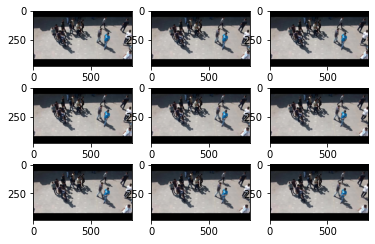

In [39]:
emotion = pd.read_csv('data/MotionEmotion/reduced_emo_labelled_dataset.csv')
emotion = emotion.rename(columns={'Unnamed: 0':'org_idx'}) 
paths = emotion.path
label = emotion.label
print(len(paths))
for i in range(9):
    plt.subplot(330 + 1 + i)
    #print(file_list[i])
    filename = paths[i]
    image = imread(filename)
    plt.imshow(image)

In [3]:
image = Image.open(paths[1])
print(image.format) 
data = asarray(image) #converting image into array
print(data.shape)

JPEG
(480, 854, 3)


## Splitting data to feed into feature extractor

There is a 70/30 split between train and test sets

Furthermore it is stratified due to class imabalance 

Test and train sets must be sorted as there is an order on the sequence of frames selected 


In [4]:
def split(emotion):
    X = emotion['path'] #np.array(features).reshape(len(features) ,-1) 
    y = emotion['label']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return x_train, x_test, y_train, y_test, X, y

In [5]:
x_train, x_test, y_train, y_test, X, y = split(emotion)
x_train = x_train.sort_values()
y_train = y_train.sort_index()
x_test = x_test.sort_values()
y_test= y_test.sort_index()

## Feeding feature extractor with images 
### Specifications: 

Model: ResNet50 - pretrained

Weights: Imagnet

Input: 224,224 

Output: 1, 2048

    Which are the number of features extracted per frame. The last FC layer which carries out the classification 
    is not being used. 
    Layer: avg_pool (GlobalAveragePooling2D) output shape:(none, 2048) # of params: 0 connected to
       ['conv5_block3_out[0][0]']  
 

In [6]:
def feature_extraction(images):
    paths = images
    features = []
    for image in paths: 
        images_ = load_img(image, target_size=(224, 224))
        # convert the image pixels to a numpy array
        images_ = img_to_array(images_)
        # reshape data for the model
        images_ = images_.reshape((1, images_.shape[0], images_.shape[1], images_.shape[2])) # prepare the image for the model
        images_ = preprocess_input(images_)
        # load model
        model = ResNet50(weights="imagenet") #include_top=False?
        #model.summary()
        # remove the output layer
        model = Model(inputs=model.inputs, outputs=model.layers[-2].output) #add batch size?
        #model.summary()
        # get extracted features
        features_ = model.predict(images_)
        print(features_.shape)
        features.append(features_)
    model.summary()
    return features

In [7]:
train_features = feature_extraction(x_train)
test_features = feature_extraction(x_test)

2022-04-25 12:48:06.104430: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


 conv2_block2_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block2_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block2_1_relu[0][0]']    
                                                                                                  
 conv2_block2_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block2_2_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block1_1_relu[0][0]']    
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block4_out[0][0]']       
          

 conv4_block4_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block3_out[0][0]']       
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block6_out[0][0]']       
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 7, 7, 512)    2359808     ['conv5_block1_1_relu[0][0]']    
          

                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 2D)                                                                                              
                                                                                                  
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1

(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)
(1, 2048)


 conv1_bn (BatchNormalization)  (None, 112, 112, 64  256         ['conv1_conv[0][0]']             
                                )                                                                 
                                                                                                  
 conv1_relu (Activation)        (None, 112, 112, 64  0           ['conv1_bn[0][0]']               
                                )                                                                 
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 114, 114, 64  0           ['conv1_relu[0][0]']             
                                )                                                                 
                                                                                                  
 pool1_pool (MaxPooling2D)      (None, 56, 56, 64)   0           ['pool1_pad[0][0]']              
          

                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 56, 56, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 56, 56, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_add (Add)         (None, 56, 56, 256)  0           ['conv2_block2_out[0][0]',       
                                                                  'conv2_block3_3_bn[0][0]']      
                                                                                                  
 conv2_block3_out (Activation)  (None, 56, 56, 256)  0           ['conv2_block3_add[0][0]']       
          

                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_add (Add)         (None, 28, 28, 512)  0           ['conv3_block2_out[0][0]',       
                                                                  'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block3_out (Activation)  (None, 28, 28, 512)  0           ['conv3_block3_add[0][0]']       
          

                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block2_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block2_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block5_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block5_3_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
          

In [36]:
from numpy import savetxt
k=0 
for i in train_features:
    #print(i)
    k +=1
    #print(j)
    savetxt('data/all_features/ResNet2048_emo/data'+ str(k) +'.csv', i, delimiter=',')
    


### Reshaping features to feed into GridSearch and classifiers

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy

train_features = np.array(train_features).reshape(len(train_features) ,-1) 
train_features = StandardScaler().fit_transform(train_features)

test_features = np.array(test_features).reshape(len(test_features) ,-1) 
test_features = StandardScaler().fit_transform(test_features)



## Searching for best parameters for each SVM 

In [16]:
from sklearn.metrics import classification_report
'''
Linear
'''
param_grid_l = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['linear']}
grid_l = RandomizedSearchCV(SVC(),param_grid_l,refit=True,verbose=2)
grid_l.fit(train_features, y_train)
print(grid_l.best_params_)
grid_predictions_l = grid_l.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_l))
print(classification_report(y_test,grid_predictions_l))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=336.32761349598906, gamma=0.12037894667795149, kernel=linear; total time=   3.6s
[CV] END C=336.32761349598906, gamma=0.12037894667795149, kernel=linear; total time=   3.4s
[CV] END C=336.32761349598906, gamma=0.12037894667795149, kernel=linear; total time=   4.1s
[CV] END C=336.32761349598906, gamma=0.12037894667795149, kernel=linear; total time=   4.3s
[CV] END C=336.32761349598906, gamma=0.12037894667795149, kernel=linear; total time=   3.6s
[CV] END C=41.55552298932596, gamma=0.07230628013008393, kernel=linear; total time=   3.5s
[CV] END C=41.55552298932596, gamma=0.07230628013008393, kernel=linear; total time=   4.0s
[CV] END C=41.55552298932596, gamma=0.07230628013008393, kernel=linear; total time=   4.5s
[CV] END C=41.55552298932596, gamma=0.07230628013008393, kernel=linear; total time=   5.1s
[CV] END C=41.55552298932596, gamma=0.07230628013008393, kernel=linear; total time=   5.1s
[CV] END C=396.452540307

In [17]:
'''
Radial
'''
param_grid_r = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf']}
grid_r = RandomizedSearchCV(SVC(),param_grid_r,refit=True,verbose=2)
grid_r.fit(train_features, y_train)
print(grid_r.best_params_)
grid_predictions_r = grid_r.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_r))
print(classification_report(y_test,grid_predictions_r))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=84.04576844742057, gamma=0.22598309183747556, kernel=rbf; total time=  31.5s
[CV] END C=84.04576844742057, gamma=0.22598309183747556, kernel=rbf; total time=  31.2s
[CV] END C=84.04576844742057, gamma=0.22598309183747556, kernel=rbf; total time=  31.1s
[CV] END C=84.04576844742057, gamma=0.22598309183747556, kernel=rbf; total time=  31.3s
[CV] END C=84.04576844742057, gamma=0.22598309183747556, kernel=rbf; total time=  31.4s
[CV] END C=11.849861698134152, gamma=0.12515779833893756, kernel=rbf; total time=  32.3s
[CV] END C=11.849861698134152, gamma=0.12515779833893756, kernel=rbf; total time=  33.4s
[CV] END C=11.849861698134152, gamma=0.12515779833893756, kernel=rbf; total time=  36.6s
[CV] END C=11.849861698134152, gamma=0.12515779833893756, kernel=rbf; total time=  38.1s
[CV] END C=11.849861698134152, gamma=0.12515779833893756, kernel=rbf; total time=  38.4s
[CV] END C=289.7308039279275, gamma=0.0990523329714270

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [20]:
from sklearn.model_selection import GridSearchCV
'''
Polynomial
'''
param_grid_p = { 'C': [0.1,1, 10], 'gamma': [0.001, 0.01, 1 ],'degree':[0.5, 1, 2, 3] ,'kernel': ['poly']}
grid_p = GridSearchCV(SVC(),param_grid_p,refit=True,verbose=2)
grid_p.fit(train_features, y_train)
print(grid_p.best_params_)
grid_predictions_p = grid_p.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_p))
print(classification_report(y_test,grid_predictions_p))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........C=0.1, degree=0.5, gamma=0.001, kernel=poly; total time=   7.6s
[CV] END ........C=0.1, degree=0.5, gamma=0.001, kernel=poly; total time=   8.9s
[CV] END ........C=0.1, degree=0.5, gamma=0.001, kernel=poly; total time=   8.6s
[CV] END ........C=0.1, degree=0.5, gamma=0.001, kernel=poly; total time=   8.7s
[CV] END ........C=0.1, degree=0.5, gamma=0.001, kernel=poly; total time=   7.7s
[CV] END .........C=0.1, degree=0.5, gamma=0.01, kernel=poly; total time=   7.6s
[CV] END .........C=0.1, degree=0.5, gamma=0.01, kernel=poly; total time=   8.5s
[CV] END .........C=0.1, degree=0.5, gamma=0.01, kernel=poly; total time=   9.0s
[CV] END .........C=0.1, degree=0.5, gamma=0.01, kernel=poly; total time=   9.2s
[CV] END .........C=0.1, degree=0.5, gamma=0.01, kernel=poly; total time=   8.9s
[CV] END ............C=0.1, degree=0.5, gamma=1, kernel=poly; total time=   7.0s
[CV] END ............C=0.1, degree=0.5, gamma=1

[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   6.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   6.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   6.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   5.9s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   7.8s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   7.8s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   7.6s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   7.7s
[CV] END ............C=1, degree=3, gamma=0.001, kernel=poly; total time=   7.6s
[CV] END .............C=1, degree=3, gamma=0.01, kernel=poly; total time=   7.8s
[CV] END .............C=1, degree=3, gamma=0.01, kernel=poly; total time=   7.9s
[CV] END .............C=1, degree=3, gamma=0.01, kernel=poly; total time=   7.7s
[CV] END .............C=1, d

In [21]:
from sklearn.model_selection import GridSearchCV

'''
Sigmoid
'''
grid_predictions_s = { 'C': [0.11, 10, 100],'kernel': ['sigmoid']}
grid_s = GridSearchCV(SVC(),grid_predictions_s,refit=True,verbose=2)
grid_s.fit(train_features, y_train)
print(grid_s.best_params_)
grid_predictions_s = grid_s.predict(test_features)
print(confusion_matrix(y_test, grid_predictions_s))
print(classification_report(y_test,grid_predictions_s))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................C=0.11, kernel=sigmoid; total time=   8.8s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   9.2s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   9.3s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   9.0s
[CV] END .............................C=0.11, kernel=sigmoid; total time=   9.2s
[CV] END ...............................C=10, kernel=sigmoid; total time=   2.3s
[CV] END ...............................C=10, kernel=sigmoid; total time=   2.4s
[CV] END ...............................C=10, kernel=sigmoid; total time=   2.3s
[CV] END ...............................C=10, kernel=sigmoid; total time=   2.7s
[CV] END ...............................C=10, kernel=sigmoid; total time=   2.6s
[CV] END ..............................C=100, kernel=sigmoid; total time=   1.7s
[CV] END ..............................C=100, ker

## Training SVM model 
#### Hyperparameters are tuned based on the results from the grid searches

In [31]:
linear = svm.SVC(kernel='linear', C=100, gamma=0.12, decision_function_shape='ovo').fit(train_features, y_train)
rbf = svm.SVC(kernel='rbf', gamma=0.2, C=84, decision_function_shape='ovo').fit(train_features, y_train)
poly = svm.SVC(kernel='poly', degree=2, C=1, gamma=0.01, decision_function_shape='ovo').fit(train_features, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(train_features, y_train)

## Predicting classes from the test set

In [32]:
linear_pred = linear.predict(test_features)
poly_pred = poly.predict(test_features)
rbf_pred = rbf.predict(test_features)
sig_pred = sig.predict(test_features)

## Visualising and Evaluating Results

In [33]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(test_features, y_test)
accuracy_poly = poly.score(test_features, y_test)
accuracy_rbf = rbf.score(test_features, y_test)
accuracy_sig = sig.score(test_features, y_test)

Accuracy Linear Kernel: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00       682

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



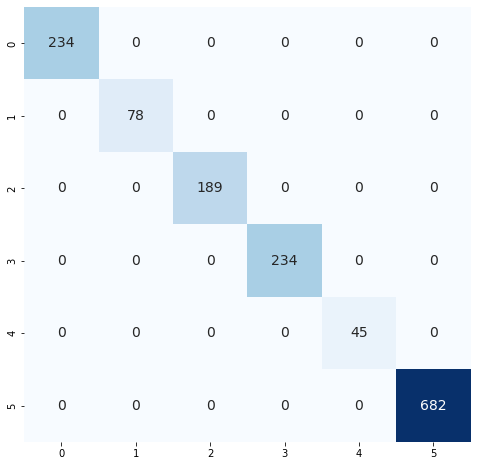

In [34]:
# creating a confusion matrix
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
print('Accuracy Linear Kernel:', accuracy_lin)
cm_lin = confusion_matrix(y_test, linear_pred)
ax = sns.heatmap(cm_lin, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, linear_pred))



Accuracy Polynomial Kernel: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       234
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       234
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00       682

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



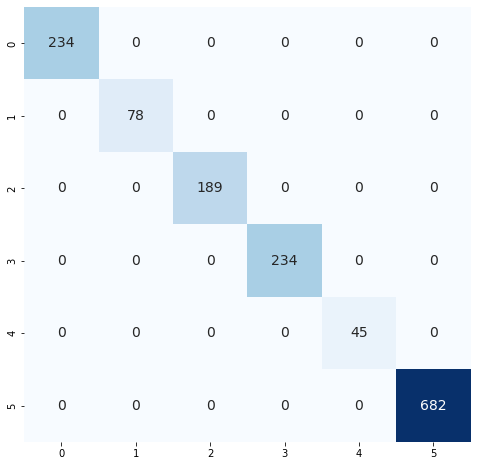

In [37]:
print('Accuracy Polynomial Kernel:', accuracy_poly)
cm_poly = confusion_matrix(y_test, poly_pred)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
ax = sns.heatmap(cm_poly, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, poly_pred))


Accuracy Radial Basis Kernel: 0.466484268125855
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00        78
           3       0.00      0.00      0.00       189
           4       0.00      0.00      0.00       234
           5       0.00      0.00      0.00        45
           6       0.47      1.00      0.64       682

    accuracy                           0.47      1462
   macro avg       0.08      0.17      0.11      1462
weighted avg       0.22      0.47      0.30      1462



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

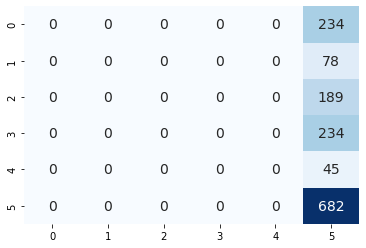

In [29]:
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
cm_rbf = confusion_matrix(y_test, rbf_pred)
ax = sns.heatmap(cm_rbf, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, rbf_pred))


Accuracy Sigmoid Kernel: 0.8522571819425444
              precision    recall  f1-score   support

           1       0.82      0.91      0.86       234
           2       0.96      1.00      0.98        78
           3       0.73      0.90      0.81       189
           4       0.80      0.59      0.68       234
           5       1.00      1.00      1.00        45
           6       0.89      0.88      0.89       682

    accuracy                           0.85      1462
   macro avg       0.87      0.88      0.87      1462
weighted avg       0.85      0.85      0.85      1462



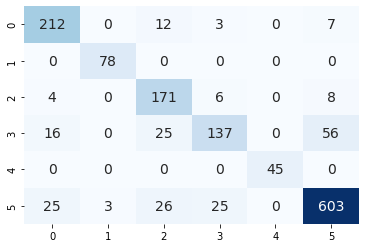

In [30]:
print('Accuracy Sigmoid Kernel:', accuracy_sig)
cm_sig = confusion_matrix(y_test, sig_pred)
ax = sns.heatmap(cm_sig, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(y_test, sig_pred))
